# EDA on Astronauts Data


In [384]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

 

In [358]:
df_astronauts = pd.read_csv("astronauts.csv")
df_astronauts.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


### Null and Unique Values

In [359]:
dtypes = df_astronauts.dtypes
Null_values = df_astronauts.isna().sum()    
df_astronauts['Year'].value_counts()
df_astronauts.nunique()

Name                   357
Year                    20
Group                   20
Status                   4
Birth Date             348
Birth Place            272
Gender                   2
Alma Mater             280
Undergraduate Major     83
Graduate Major         143
Military Rank           12
Military Branch         14
Space Flights            8
Space Flight (hr)      270
Space Walks             11
Space Walks (hr)        52
Missions               305
Death Date              38
Death Mission            3
dtype: int64

### Missing Values Analysis

Text(0.5, 1.0, 'Total Missing Values')

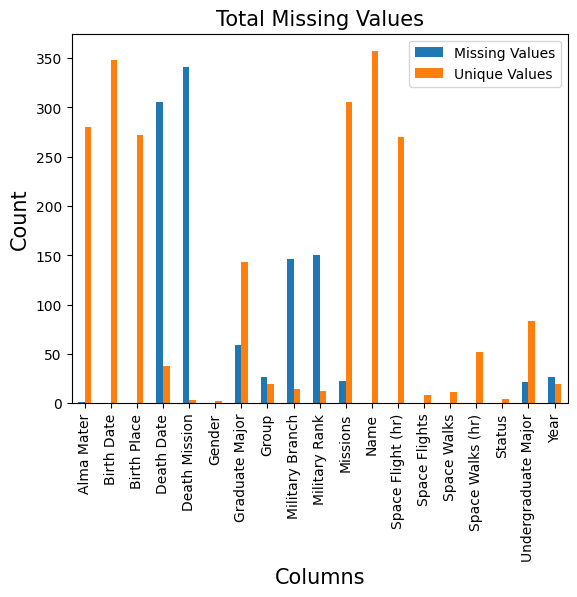

In [360]:
missingValues = df_astronauts.isna().sum().sort_values(ascending=False) 
unique_values = df_astronauts.nunique().sort_values(ascending=False)
summary = pd.DataFrame({
    'Missing Values': missingValues,
    'Unique Values': unique_values
})
summary.plot(kind='bar')
plt.xlabel("Columns", fontsize = 15)
plt.ylabel("Count", fontsize =  15)
plt.title("Total Missing Values", fontsize = 15)




### Mean, Median, Mode 
Using df_numerics : Mean and Median calculated for numerical columns.


In [361]:
df_numerics = df_astronauts.select_dtypes(include = ["number"])

mean_values = df_numerics.mean()
median = df_numerics.median()
mode = df_astronauts.mode()

print("Mean \n",mean_values) 
print("\nMedian \n",median)
print("\nMode \n", mode.iloc[0])

Mean 
 Year                 1985.106061
Group                  11.409091
Space Flights           2.364146
Space Flight (hr)    1249.266106
Space Walks             1.246499
Space Walks (hr)        7.707283
dtype: float64

Median 
 Year                 1987.0
Group                  12.0
Space Flights           2.0
Space Flight (hr)     590.0
Space Walks             0.0
Space Walks (hr)        0.0
dtype: float64

Mode 
 Name                       Alan B. Shepard Jr. 
Year                                     1978.0
Group                                       8.0
Status                                  Retired
Birth Date                           10/27/1946
Birth Place                       Cleveland, OH
Gender                                     Male
Alma Mater                     US Naval Academy
Undergraduate Major                     Physics
Graduate Major         Aeronautical Engineering
Military Rank                           Colonel
Military Branch          US Air Force (Retired)
Spa

# Visualizations

## Trend Analysis

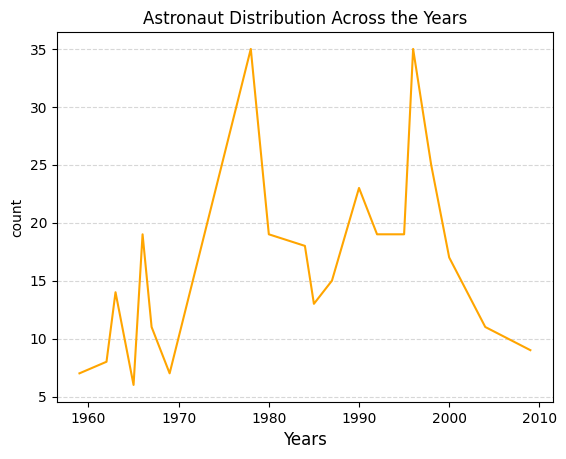

In [362]:
yearly_counts = df_astronauts.groupby('Year').size().reset_index(name='count' )

sns.lineplot(x = 'Year',y = 'count',data = yearly_counts,color = 'orange' )
plt.xlabel('Years', fontsize=12)
plt.title('Astronaut Distribution Across the Years')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Pair Relationship

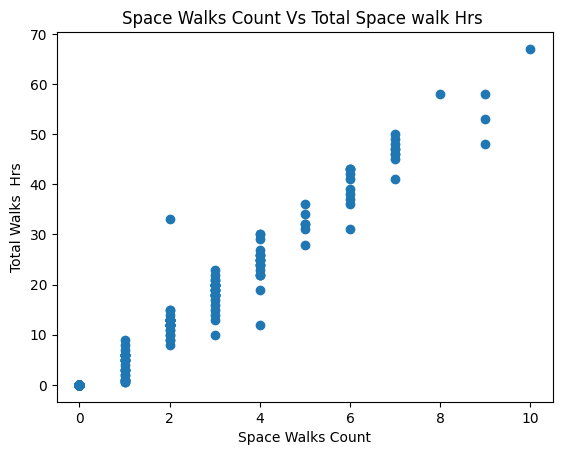

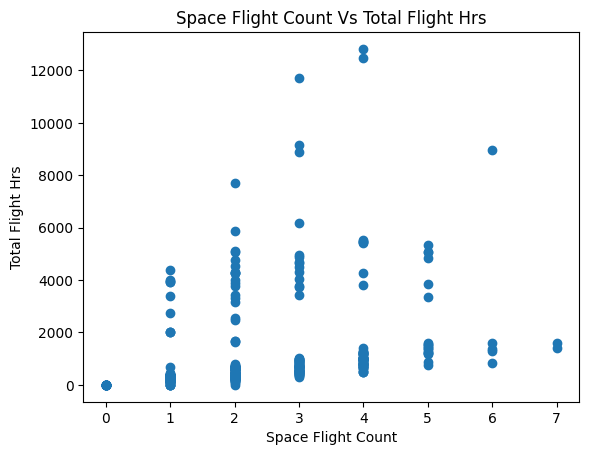

In [363]:

plt.scatter(x = df_astronauts['Space Walks'] ,y = df_astronauts['Space Walks (hr)'] )
plt.title('Space Walks Count Vs Total Space walk Hrs ')
plt.xlabel('Space Walks Count')
plt.ylabel('Total Walks  Hrs')
plt.show()

plt.scatter(x = df_astronauts['Space Flights'] ,y = df_astronauts['Space Flight (hr)'] )
plt.title('Space Flight Count Vs Total Flight Hrs')
plt.xlabel('Space Flight Count')
plt.ylabel('Total Flight Hrs')
plt.show()


In [400]:
df_astronauts['Birth Date']

0      5/17/1967
1       3/7/1936
2       3/3/1946
3      5/20/1951
4      1/20/1930
         ...    
352    8/23/1956
353    7/26/1962
354     2/7/1932
355    9/24/1930
356    6/29/1962
Name: Birth Date, Length: 357, dtype: object

### Age 

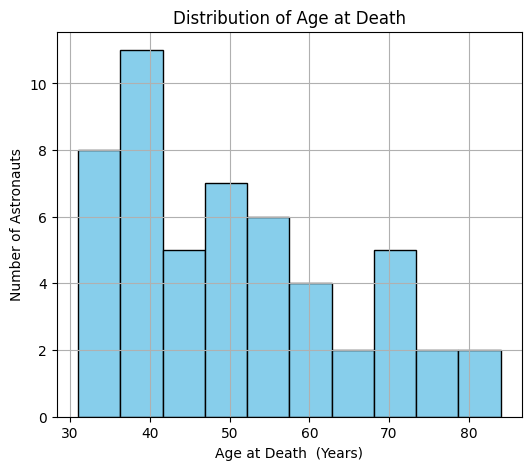

In [404]:
dates = df_astronauts.loc[df_astronauts['Death Date'].notna()].loc[:,['Birth Date', 'Death Date']]
age  =  (pd.to_datetime(dates['Death Date'],format = "mixed") - pd.to_datetime(dates['Birth Date'],format = "mixed")).dt.days // 365
plt.figure(figsize=(6, 5))
plt.hist(age, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Age at Death  (Years)")
plt.ylabel("Number of Astronauts")
plt.title("Distribution of Age at Death")
plt.grid(True) 
plt.show()

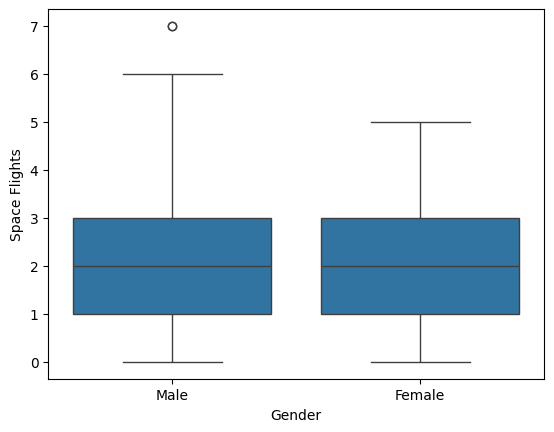

In [364]:

fig, ax = plt.subplots()
sns.boxplot(x='Gender', y='Space Flights', data=df_astronauts,ax = ax)
plt.show()

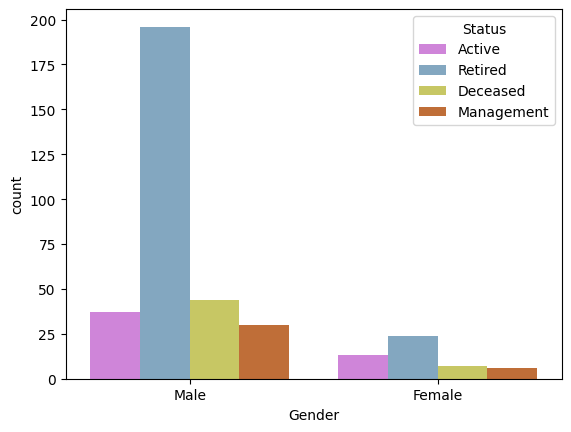

In [365]:
status_palette = {
    'Active': "#da77e7",      # muted blue
    'Retired': "#79a9ca",     # muted orange
    'Deceased': "#D8D853",    # professional green
    'Management': "#d66921"   # muted purple
}

sns.countplot(x='Gender', hue='Status', data=df_astronauts,palette= status_palette) 
plt.show()


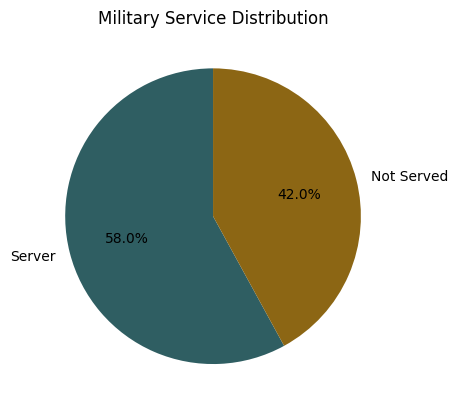

In [366]:
have_military_rank = df_astronauts['Military Rank'].notna().sum()
not_in_military = df_astronauts['Military Rank'].isna().sum()
LABELS = ['Server', 'Not Served']
counts = [have_military_rank,not_in_military]
colors =   ["#2F5E62", "#8C6614"]
plt.pie(counts, labels=LABELS, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Military Service Distribution') 
plt.show()

# Correlation Analysis

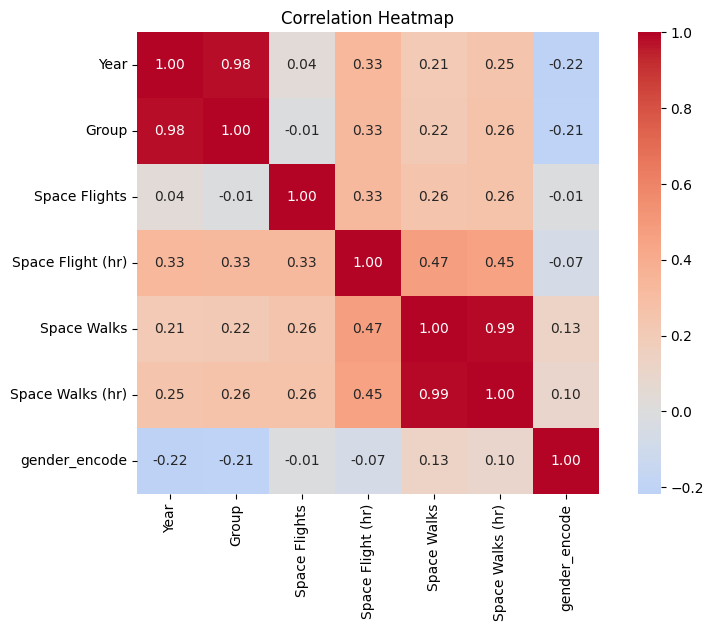

In [367]:
 
df_astronauts['gender_encode'] = df_astronauts['Gender'].map({'Male': 1, 'Female': 0})
corr = df_astronauts.corr(numeric_only=True)  # Use numeric columns only

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [368]:
df_numerics = df_astronauts.select_dtypes(include = ['float64', 'int64'])
corr = df_numerics.corr() 
corr
 


,Year,Group,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),gender_encode
Year,1.000000,0.980934,0.036420,0.331386,0.210073,0.253502,-0.218140
Group,0.980934,1.000000,-0.011386,0.325683,0.217891,0.261384,-0.207875
Space Flights,0.036420,-0.011386,1.000000,0.325233,0.257073,0.258642,-0.010142
Space Flight (hr),0.331386,0.325683,0.325233,1.000000,0.472796,0.454408,-0.069893
Space Walks,0.210073,0.217891,0.257073,0.472796,1.000000,0.985755,0.127017
Space Walks (hr),0.253502,0.261384,0.258642,0.454408,0.985755,1.000000,0.098775
gender_encode,-0.218140,-0.207875,-0.010142,-0.069893,0.127017,0.098775,1.000000


## Grouped Data

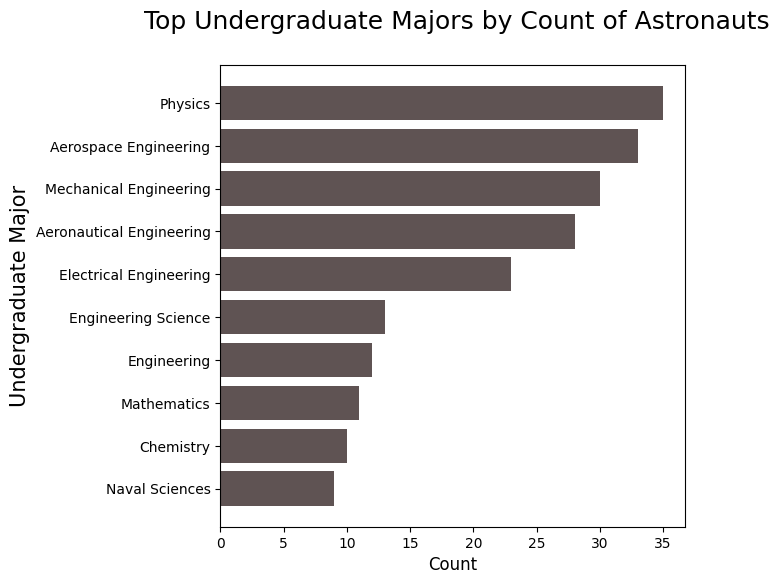

In [369]:
field_of_study = df_astronauts.groupby('Undergraduate Major').size().reset_index(name='Count')
top_fields = field_of_study.sort_values(by=['Count'])[-10:]
plt.figure(figsize=(6,6))
plt.barh(top_fields['Undergraduate Major'], top_fields['Count'], color="#5F5353" )
plt.ylabel('Undergraduate Major', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.title(' Top Undergraduate Majors by Count of Astronauts\n', fontsize=18)
 
plt.show()

In [370]:
df_astronauts.groupby('Alma Mater').size().reset_index(name= "Count").sort_values(by = ["Count"], ascending= [False])

,Alma Mater,Count
166,US Naval Academy,12
177,US Naval Academy; US Naval Postgraduate School,11
86,Purdue University,7
139,US Air Force Academy; Purdue University,7
174,US Naval Academy; MIT,5
...,...,...
19,Carnegie-Mellon University; University of Mary...,1
20,Case Western Reserve University; Cornell Unive...,1
21,City College of New York; Rutgers University,1
22,College of William & Mary; Eastern Virginia Me...,1


# Data Pre-Processing

## Handling Missing Values

There are 3 ways to handle missing values:

1. **Remove**  
  
2. **Replace**  
   Replace missing values with:
   - Mean (for numerical data)
   - Mode (for categorical/string data)  
3. **Mask**  
   Use a special placeholder value to indicate missingness without altering data.


In [371]:
for col in df_astronauts.columns:
    if df_astronauts[col].dtype in ["float64", "int64"] : 
        df_astronauts[col] = df_astronauts[col].fillna(df_astronauts[col].mean())
    
    else:
        df_astronauts[col] = df_astronauts[col].fillna(df_astronauts[col].mode().iloc[0])
         
df_astronauts.isna().sum()

Name                   0
Year                   0
Group                  0
Status                 0
Birth Date             0
Birth Place            0
Gender                 0
Alma Mater             0
Undergraduate Major    0
Graduate Major         0
Military Rank          0
Military Branch        0
Space Flights          0
Space Flight (hr)      0
Space Walks            0
Space Walks (hr)       0
Missions               0
Death Date             0
Death Mission          0
gender_encode          0
dtype: int64

## Encode categorical variables

In [372]:
df_astronauts['Status'].value_counts() 

Status
Retired       220
Deceased       51
Active         50
Management     36
Name: count, dtype: int64

In [373]:
#Encode gender earlier for correlation analysis 
#Now Encode the status 
df_astronauts['status_encode'] = df_astronauts['Status'].map({'Active': 1,'Management':2, 'Retired': 3,'Deceased':4})
df_astronauts["status_encode"].value_counts() 

status_encode
3    220
4     51
1     50
2     36
Name: count, dtype: int64

In [374]:
from sklearn.calibration import LabelEncoder


branch_counts = df_astronauts['Military Branch'].value_counts()
df_astronauts['Branch group']  = df_astronauts['Military Branch'].apply(lambda x:x  if branch_counts[x]>=10 else "Other")
 
rank_counts = df_astronauts['Military Rank'].value_counts()
df_astronauts['Rank group']  = df_astronauts['Military Rank'].apply(lambda x:x if rank_counts[x]>=10 else "Other")

df_astronauts['Rank group'] = LabelEncoder().fit_transform(df_astronauts['Rank group'])
df_astronauts['Branch group'] = LabelEncoder().fit_transform(df_astronauts['Branch group'])
df_numerics = df_astronauts.select_dtypes(include = ['float64', 'int64'])
corr_with_label = df_numerics.corr()['Space Walks (hr)'].sort_values(ascending= False)[1:]
corr_with_label


Space Walks          0.985755
Space Flight (hr)    0.454408
Space Flights        0.258642
Group                0.257795
Year                 0.250021
gender_encode        0.098775
Branch group        -0.036850
Rank group          -0.102416
status_encode       -0.347458
Name: Space Walks (hr), dtype: float64

### Way to Normalize features are :
- Standarization
- Normalization using  **MinMaXScalar** from Sklearn library
### But in random Forest scaling is not required 

# Machine Learning Model

In [375]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 



Selected First 350 rows to train and test data  

In [376]:
total_features = df_astronauts.loc[:350, ['Year', 'gender_encode','Space Flights', 'Space Walks', 'Rank group']]
features = df_astronauts.loc[: 350, ['Year', 'gender_encode','Space Flights', 'Space Walks', 'Rank group']]
total_targets = df_astronauts['Space Walks (hr)']
targets = df_astronauts['Space Walks (hr)'].loc[:350]


In [377]:

X_train, X_test, y_train, y_test = train_test_split(features,targets, test_size=0.3 ,random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [378]:
# Evaluate 
score_test = model.score(X_test, y_test)
score_on_train_data =  model.score(X_train, y_train)

print("Model R^2 Score on train data :", round(score_on_train_data, 3))
print("Model R^2 Score on test data :", round(score_test, 3)) 

Model R^2 Score on train data : 0.994
Model R^2 Score on test data : 0.961


In [379]:
## checking on remaining 6 rows
true_label = df_astronauts['Space Walks (hr)'].loc[351] 
X = df_astronauts.loc[[351], ['Year', 'gender_encode','Space Flights', 'Space Walks', 'Rank group']]  
pred = model.predict(X)
"prediction ", pred, " True label ", true_label


('prediction ', array([18.28]), ' True label ', np.float64(20.0))

In [380]:
import joblib

# Save the model
joblib.dump(model, 'rf_model.pkl')



['rf_model.pkl']

In [381]:
df_astronauts = pd.read_csv('astronauts.csv')
sample = df_astronauts.tail().drop('Space Walks (hr)',axis = 1)

In [382]:
sample.to_csv("sample.csv",index = False)
df_sample = pd.read_csv("sample.csv")
df_sample

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Missions,Death Date,Death Mission
0,David A. Wolf,1990.0,13.0,Retired,8/23/1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN
1,Neil W. Woodward III,1998.0,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,NaN,NaN,NaN
2,Alfred M. Worden,1966.0,5.0,Retired,2/7/1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,Apollo 15,NaN,NaN
3,John W. Young,1962.0,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN
4,George D. Zamka,1998.0,17.0,Retired,6/29/1962,"Jersey City, NJ",Male,US Naval Academy; Florida Institute of Technology,Mathematics,Engineering Management,Colonel,US Marine Corps (Retired),2,692,0,"STS-120 (Discovery), STS-130 (Endeavor)",NaN,NaN
